In [145]:
import requests
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as nd
import tensorflow as tf
import tensorflow_hub as hub
import imageio
from google_images_download import google_images_download
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import PIL.Image
import PIL.ImageOps
from scipy.spatial import cKDTree
from skimage.feature import plot_matches
from skimage.filters import gaussian
from skimage.measure import ransac
from skimage.transform import AffineTransform
from skimage import color, io
from skimage.exposure import rescale_intensity


In [138]:
module = hub.Module("https://tfhub.dev/google/imagenet/resnet_v1_50/classification/1")
height, width = hub.get_expected_image_size(module)
height, width

(224, 224)

In [139]:
response = google_images_download.googleimagesdownload()
arguments = {"keywords": "animal national park", "limit": 20,
             "print_urls": True}
absolute_image_paths = response.download(arguments)


Item no.: 1 --> Item name = animal national park
Evaluating...
Starting Download...
Image URL: https://i.ytimg.com/vi/P8NJa_YoRxk/maxresdefault.jpg
Completed Image ====> 1.maxresdefault.jpg
Image URL: https://k6u8v6y8.stackpathcdn.com/blog/wp-content/uploads/2017/06/Royal-Bengal-Tiger.jpg
Completed Image ====> 2.Royal-Bengal-Tiger.jpg
Image URL: https://www.corbettnationalpark.in/blog/wp-content/uploads/2015/08/cropped-13625772024_1fd7467d29_k1.jpg
Completed Image ====> 3.cropped-13625772024_1fd7467d29_k1.jpg
Image URL: https://www.nps.gov/arch/learn/nature/images/ARK_6.jpg?maxwidth=1200&maxheight=1200&autorotate=false
Completed Image ====> 4.ARK_6.jpg
Image URL: https://npca.s3.amazonaws.com/images/8135/2c7e0d75-c7ff-4336-99d7-259448d03a4d-banner.jpg?1445969501
Completed Image ====> 5.2c7e0d75-c7ff-4336-99d7-259448d03a4d-banner.jpg
Image URL: https://k6u8v6y8.stackpathcdn.com/blog/wp-content/uploads/2014/04/national-parks-and-wildlife-sanctuaries-in-india.png
Completed Image ====> 6.

In [150]:
image_list = absolute_image_paths[0]['animal national park']
image_list

['C:\\Users\\lilyx\\DS-Unit-4-Sprint-3-Deep-Learning\\module2-convolutional-neural-networks\\downloads\\animal national park\\1.maxresdefault.jpg',
 'C:\\Users\\lilyx\\DS-Unit-4-Sprint-3-Deep-Learning\\module2-convolutional-neural-networks\\downloads\\animal national park\\2.Royal-Bengal-Tiger.jpg',
 'C:\\Users\\lilyx\\DS-Unit-4-Sprint-3-Deep-Learning\\module2-convolutional-neural-networks\\downloads\\animal national park\\3.cropped-13625772024_1fd7467d29_k1.jpg',
 'C:\\Users\\lilyx\\DS-Unit-4-Sprint-3-Deep-Learning\\module2-convolutional-neural-networks\\downloads\\animal national park\\4.ARK_6.jpg',
 'C:\\Users\\lilyx\\DS-Unit-4-Sprint-3-Deep-Learning\\module2-convolutional-neural-networks\\downloads\\animal national park\\5.2c7e0d75-c7ff-4336-99d7-259448d03a4d-banner.jpg',
 'C:\\Users\\lilyx\\DS-Unit-4-Sprint-3-Deep-Learning\\module2-convolutional-neural-networks\\downloads\\animal national park\\6.national-parks-and-wildlife-sanctuaries-in-india.png',
 'C:\\Users\\lilyx\\DS-Unit-4-

In [73]:
def resize_image(filename, new_width=256, new_height=256):#the delf model was trained on images 256x256 the input of our model also should be 256x256
  pil_image = Image.open(filename)
  pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.ANTIALIAS)
  pil_image_rgb = pil_image.convert('RGB')
  pil_image_rgb.save(filename, format='JPEG', quality=90)

for i in image_list:
     resize_image(i)

In [134]:
import os
pathimg = os.path.abspath('C:\\Users\\lilyx\\DS-Unit-4-Sprint-3-Deep-Learning\\module2-convolutional-neural-networks\\downloads\\animalnationalpark')
print(pathimg)

C:\Users\lilyx\DS-Unit-4-Sprint-3-Deep-Learning\module2-convolutional-neural-networks\downloads\animalnationalpark


In [135]:
for filename in os.listdir('C:\\Users\\lilyx\\DS-Unit-4-Sprint-3-Deep-Learning\\module2-convolutional-neural-networks\\downloads\\animalnationalpark'):
    if filename.endswith('.jpg'):
        print(filename)

1.maxresdefault.jpg
10.moose-moosecalf-1280x853.jpg
10.zebras-in-kidepo-750x450.jpg
11.addo-elephant-national-park-elephants-590x390.jpg
11.zebras-in-kidepo-750x450.jpg
12.lion-520x400.jpg
12.nameri-national-park-is-famous-for-which-animal.jpg
13.lion-520x400.jpg
13.Nairobi_National_Park%2C_Kenya_%2832570316676%29.jpg
14.lion-520x400.jpg
14.nairobi-national-park.jpg
14.Nairobi_National_Park%2C_Kenya_%2832570316676%29.jpg
14.Tiger_Kanha_National_Park.jpg
15.Bandhavgarh.jpg
15.lion-520x400.jpg
15.nairobi-national-park.jpg
15.Nairobi_National_Park%2C_Kenya_%2832570316676%29.jpg
15.Tiger_Kanha_National_Park.jpg
16.Bandhavgarh.jpg
16.Dudhwa-National-Park.jpg
16.Sariska-national-Park.jpg
16.Tiger_Kanha_National_Park.jpg
17.Bandhavgarh.jpg
17.Dudhwa-National-Park.jpg
17.Sariska-national-Park.jpg
18.2-day-kruger-slider1.jpg
18.Dudhwa-National-Park.jpg
18.Grizzly-DanRafla.jpg
18.Sariska-national-Park.jpg
19.2-day-kruger-slider1.jpg
19.Sariska-national-Park.jpg
19.Van-Vihar-National-Parkbhopal.j

In [169]:
# for filename in os.listdir('C:\\Users\\lilyx\\DS-Unit-4-Sprint-3-Deep-Learning\\module2-convolutional-neural-networks\\downloads\\animalnationalpark'):
#     if filename.endswith('.jpg'):
#         resize_image(filename)

In [168]:
# import os
# import glob

# for filepath in glob.glob(os.path.join('C:\\Users\\lilyx\\DS-Unit-4-Sprint-3-Deep-Learning\\module2-convolutional-neural-networks\\downloads\\animalnationalpark', '*.jpg')):
#     with open(filepath, encoding="utf8") as f:
#         content = f.read()

In [167]:
# with open(r'C:\Users\lilyx\DS-Unit-4-Sprint-3-Deep-Learning\module2-convolutional-neural-networks\downloads\animalnationalpark', encoding='utf-8') as f:
#     contents = f.read()

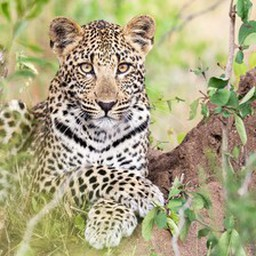

In [179]:
from IPython.display import Image
Image(filename='downloads\\animalnationalpark\\1.maxresdefault.jpg', width=600)

In [154]:
for i in range(len(image_list[0:17])):
    resize_image(image_list[i])

In [166]:
import numpy as np

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions#take probabilities

def process_img_path(img_path):
  return image.load_img(img_path, target_size=(224, 224))

def img_contains_banana(img):
  x = image.img_to_array(img)#takes in the image
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  model = ResNet50(weights='imagenet')
  features = model.predict(x)#predict what's in the model
  results = decode_predictions(features, top=3)[0]#get the top 3 probabilities and also label associated
  print(results)
  for entry in results:
    if entry[1] == 'banana':#if the first entry returns banana, do nothing, if not, return second entry
      return entry[2]#outputs a list of probabilities
  return 0.0

In [182]:
result = img_contains_banana(process_img_path('downloads\\animalnationalpark\\1.maxresdefault.jpg'))

[('n02128385', 'leopard', 0.90337455), ('n02128925', 'jaguar', 0.09392843), ('n02130308', 'cheetah', 0.0012670842)]


In [183]:
type(result)

float

In [187]:
result = img_contains_banana(process_img_path(image_list[0]))

[('n02128385', 'leopard', 0.88264394), ('n02128925', 'jaguar', 0.114632435), ('n02130308', 'cheetah', 0.001190086)]


In [204]:
labels = []
for i in image_list[0:17]:
    results = img_contains_banana(process_img_path(i))
    labels.append(results)

[('n02128385', 'leopard', 0.88264394), ('n02128925', 'jaguar', 0.114632435), ('n02130308', 'cheetah', 0.001190086)]
[('n02129604', 'tiger', 0.92627996), ('n02123159', 'tiger_cat', 0.07226287), ('n02128925', 'jaguar', 0.0009025711)]
[('n02129604', 'tiger', 0.7467873), ('n02123159', 'tiger_cat', 0.2515752), ('n02129165', 'lion', 0.00044137178)]
[('n02415577', 'bighorn', 0.3830797), ('n02422699', 'impala', 0.25835845), ('n02423022', 'gazelle', 0.19404428)]
[('n02114367', 'timber_wolf', 0.22606285), ('n02114712', 'red_wolf', 0.224383), ('n02396427', 'wild_boar', 0.18544012)]
[('n02129604', 'tiger', 0.9167059), ('n02123159', 'tiger_cat', 0.04479697), ('n02128925', 'jaguar', 0.011970349)]
[('n02422699', 'impala', 0.4663775), ('n02423022', 'gazelle', 0.44377324), ('n02417914', 'ibex', 0.013608409)]
[('n02132136', 'brown_bear', 0.99495834), ('n02133161', 'American_black_bear', 0.0028395385), ('n02134418', 'sloth_bear', 0.0015523904)]
[('n02391049', 'zebra', 0.9996793), ('n01798484', 'prairie_c

In [206]:
labelmatrix = [[('n02128385', 'leopard', 0.88264394), ('n02128925', 'jaguar', 0.114632435), ('n02130308', 'cheetah', 0.001190086)],
[('n02129604', 'tiger', 0.92627996), ('n02123159', 'tiger_cat', 0.07226287), ('n02128925', 'jaguar', 0.0009025711)],
[('n02129604', 'tiger', 0.7467873), ('n02123159', 'tiger_cat', 0.2515752), ('n02129165', 'lion', 0.00044137178)],
[('n02415577', 'bighorn', 0.3830797), ('n02422699', 'impala', 0.25835845), ('n02423022', 'gazelle', 0.19404428)],
[('n02114367', 'timber_wolf', 0.22606285), ('n02114712', 'red_wolf', 0.224383), ('n02396427', 'wild_boar', 0.18544012)],
[('n02129604', 'tiger', 0.9167059), ('n02123159', 'tiger_cat', 0.04479697), ('n02128925', 'jaguar', 0.011970349)],
[('n02422699', 'impala', 0.4663775), ('n02423022', 'gazelle', 0.44377324), ('n02417914', 'ibex', 0.013608409)],
[('n02132136', 'brown_bear', 0.99495834), ('n02133161', 'American_black_bear', 0.0028395385), ('n02134418', 'sloth_bear', 0.0015523904)],
[('n02391049', 'zebra', 0.9996793), ('n01798484', 'prairie_chicken', 8.401477e-05), ('n02129604', 'tiger', 4.013994e-05)],
[('n02115913', 'dhole', 0.29518008), ('n02132136', 'brown_bear', 0.20384106), ('n02410509', 'bison', 0.14950456)],
[('n02504458', 'African_elephant', 0.99224454), ('n02504013', 'Indian_elephant', 0.0060443403), ('n01871265', 'tusker', 0.0016854334)],
[('n02114855', 'coyote', 0.48185888), ('n02115913', 'dhole', 0.120374344), ('n02115641', 'dingo', 0.07124561)],
[('n02391049', 'zebra', 0.9999641), ('n02129604', 'tiger', 1.6713673e-05), ('n01798484', 'prairie_chicken', 5.360531e-06)],
[('n02129165', 'lion', 0.9997074), ('n02129604', 'tiger', 0.00014379855), ('n02128385', 'leopard', 7.5439195e-05)],
[('n02129165', 'lion', 0.99899286), ('n02117135', 'hyena', 0.0005306696), ('n02132136', 'brown_bear', 0.0001170203)],
[('n02129604', 'tiger', 0.7085922), ('n02123159', 'tiger_cat', 0.29139695), ('n02391049', 'zebra', 6.1794685e-06)],
[('n02129604', 'tiger', 0.95592153), ('n02123159', 'tiger_cat', 0.043489903), ('n02128925', 'jaguar', 0.0003770718)]]

In [207]:
import pandas as pd
df = pd.DataFrame(labelmatrix)
df

,0,1,2
0,"(n02128385, leopard, 0.88264394)","(n02128925, jaguar, 0.114632435)","(n02130308, cheetah, 0.001190086)"
1,"(n02129604, tiger, 0.92627996)","(n02123159, tiger_cat, 0.07226287)","(n02128925, jaguar, 0.0009025711)"
2,"(n02129604, tiger, 0.7467873)","(n02123159, tiger_cat, 0.2515752)","(n02129165, lion, 0.00044137178)"
3,"(n02415577, bighorn, 0.3830797)","(n02422699, impala, 0.25835845)","(n02423022, gazelle, 0.19404428)"
4,"(n02114367, timber_wolf, 0.22606285)","(n02114712, red_wolf, 0.224383)","(n02396427, wild_boar, 0.18544012)"
5,"(n02129604, tiger, 0.9167059)","(n02123159, tiger_cat, 0.04479697)","(n02128925, jaguar, 0.011970349)"
6,"(n02422699, impala, 0.4663775)","(n02423022, gazelle, 0.44377324)","(n02417914, ibex, 0.013608409)"
7,"(n02132136, brown_bear, 0.99495834)","(n02133161, American_black_bear, 0.0028395385)","(n02134418, sloth_bear, 0.0015523904)"
8,"(n02391049, zebra, 0.9996793)","(n01798484, prairie_chicken, 8.401477e-05)","(n02129604, tiger, 4.013994e-05)"
9,"(n02115913, dhole, 0.29518008)","(n02132136, brown_bear, 0.20384106)","(n02410509, bison, 0.14950456)"


In [155]:
# image_list[3]

In [156]:
# resize_image(image_list[0])

In [157]:
# for i in image_list:
#      resize_image(i)
# # len(image_list)

In [158]:
# images = [resize_image(image) for image in image_list[0:17]]
# images

In [159]:
# import os

# cwd = os.getcwd()  # Get the current working directory (cwd)
# files = os.listdir(cwd)  # Get all the files in that directory
# print("Files in %r: %s" % (cwd, files))

In [160]:
# from PIL import Image 
  
# filename = "C:\\Users\\lilyx\\DS-Unit-4-Sprint-3-Deep-Learning\\module2-convolutional-neural-networks\\downloads\\animalnationalpark\\1.maxresdefault.jpg"
# with Image.open(filename) as image: 
#     width, height = image.size
    
# width

In [161]:
# from PIL import Image 
  
# filename = filename
# with Image.open(filename) as image: 
#     width, height = image.size 

In [162]:
# from PIL import Image 
  
# filename = "C:\\Users\\lilyx\\DS-Unit-4-Sprint-3-Deep-Learning\\module2-convolutional-neural-networks\\downloads\\animalnationalpark"
# #with Image.open(filename) as image: 
# files = os.listdir(filename)
# for i in files:
#     resize_image(i)
#     width, height = image.size
#     print(width)



In [163]:
# import os
# THIS_FOLDER = os.path.dirname(os.path.abspath('C:\\Users\\lilyx\\DS-Unit-4-Sprint-3-Deep-Learning\\module2-convolutional-neural-networks\\downloads\\animalnationalpark'))
# my_file = os.path.join(THIS_FOLDER, 'animalnationalpark\\1.maxresdefault.jpg')
# #resize_image(my_file)
# for i in os.listdir(my_file):
#     print(i)

In [164]:
# def show_images(image_list):
#     for i in image_list:
#         resize_image(i)
# show_images(image_list)